In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path = "/content/drive/MyDrive/bone+marrow+transplant+children.zip"

# Destination folder
extract_path = "/content/drive/MyDrive/bone+marrow"

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)


['bone-marrow.arff', 'bone-marrow.csv']

In [ ]:
from scipy.io import arff
import pandas as pd
import os

# Path to the extracted folder/content/drive/MyDrive/bone+marrow
extract_path = "/content/drive/MyDrive/bone+marrow"

# Find the ARFF file
arff_files = [file for file in os.listdir(extract_path) if file.endswith(".arff")]
if not arff_files:
    print("No ARFF files found.")
else:
    arff_file_path = os.path.join(extract_path, arff_files[0])

    # Load ARFF file
    data, meta = arff.loadarff(arff_file_path)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Save as CSV
    csv_file_path = arff_file_path.replace(".arff", ".csv")
    df.to_csv(csv_file_path, index=False)

    print(f"Converted {arff_files[0]} to CSV: {csv_file_path}")


Converted bone-marrow.arff to CSV: /content/drive/MyDrive/bone+marrow/bone-marrow.csv


In [ ]:
df = pd.read_csv(csv_file_path)

In [ ]:
print("\n📊 Dataset Overview:")
print(df.info())


📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              187 non-null    object 
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Tx

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew # Import kurtosis and skew from scipy.stats


numerical_cols = df.select_dtypes(include=[np.number])

# Calculate kurtosis and skewness
kurtosis_values = numerical_cols.apply(kurtosis)
skewness_values = numerical_cols.apply(skew)

print("Kurtosis Values:\n", kurtosis_values)
print("\nSkewness Values:\n", skewness_values)

Kurtosis Values:
 Donorage                -0.624193
Recipientage            -1.176653
CD34kgx10d6              4.765998
CD3dCD34                      NaN
CD3dkgx10d8                   NaN
Rbodymass                     NaN
ANCrecovery             32.427473
PLTrecovery              6.100000
time_to_aGvHD_III_IV    -0.257964
survival_time           -0.492716
survival_status         -1.966667
dtype: float64

Skewness Values:
 Donorage                0.216449
Recipientage            0.070555
CD34kgx10d6             1.973628
CD3dCD34                     NaN
CD3dkgx10d8                  NaN
Rbodymass                    NaN
ANCrecovery             5.867493
PLTrecovery             2.846050
time_to_aGvHD_III_IV   -1.319862
survival_time           0.747217
survival_status         0.182574
dtype: float64


In [ ]:
print("\n📈 Statistical Summary:")
print(df.describe())


📈 Statistical Summary:
         Donorage  Recipientage  CD34kgx10d6    CD3dCD34  CD3dkgx10d8  \
count  187.000000    187.000000   187.000000  182.000000   182.000000   
mean    33.472068      9.931551    11.891781    5.385096     4.745714   
std      8.271826      5.305639     9.914386    9.598716     3.859128   
min     18.646575      0.600000     0.790000    0.204132     0.040000   
25%     27.039726      5.050000     5.350000    1.786683     1.687500   
50%     33.550685      9.600000     9.720000    2.734462     4.325000   
75%     40.117809     14.050000    15.415000    5.823565     6.785000   
max     55.553425     20.200000    57.780000   99.560970    20.020000   

        Rbodymass     ANCrecovery     PLTrecovery  time_to_aGvHD_III_IV  \
count  185.000000      187.000000      187.000000            187.000000   
mean    35.801081    26752.866310    90937.919786         775408.042781   
std     19.650922   161747.200525   288242.407688         418425.252689   
min      6.000000 

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Recipientgender,0
Stemcellsource,0
Donorage,0
Donorage35,0
IIIV,0
Gendermatch,0
DonorABO,0
RecipientABO,0
RecipientRh,0
ABOmatch,0


In [ ]:
# Fill missing values using dictionary-based inplace method
df.fillna({
    'CD34kgx10d6': df['CD34kgx10d6'].median(),
    'CD3dCD34': df['CD3dCD34'].median(),
    'CD3dkgx10d8': df['CD3dkgx10d8'].median(),
    'Rbodymass': df['Rbodymass'].median()
}, inplace=True)

print("Missing values filled correctly without warnings!")


Missing values filled correctly without warnings!


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical features encoded successfully!")


Categorical features encoded successfully!


<Figure size 1500x1200 with 0 Axes>

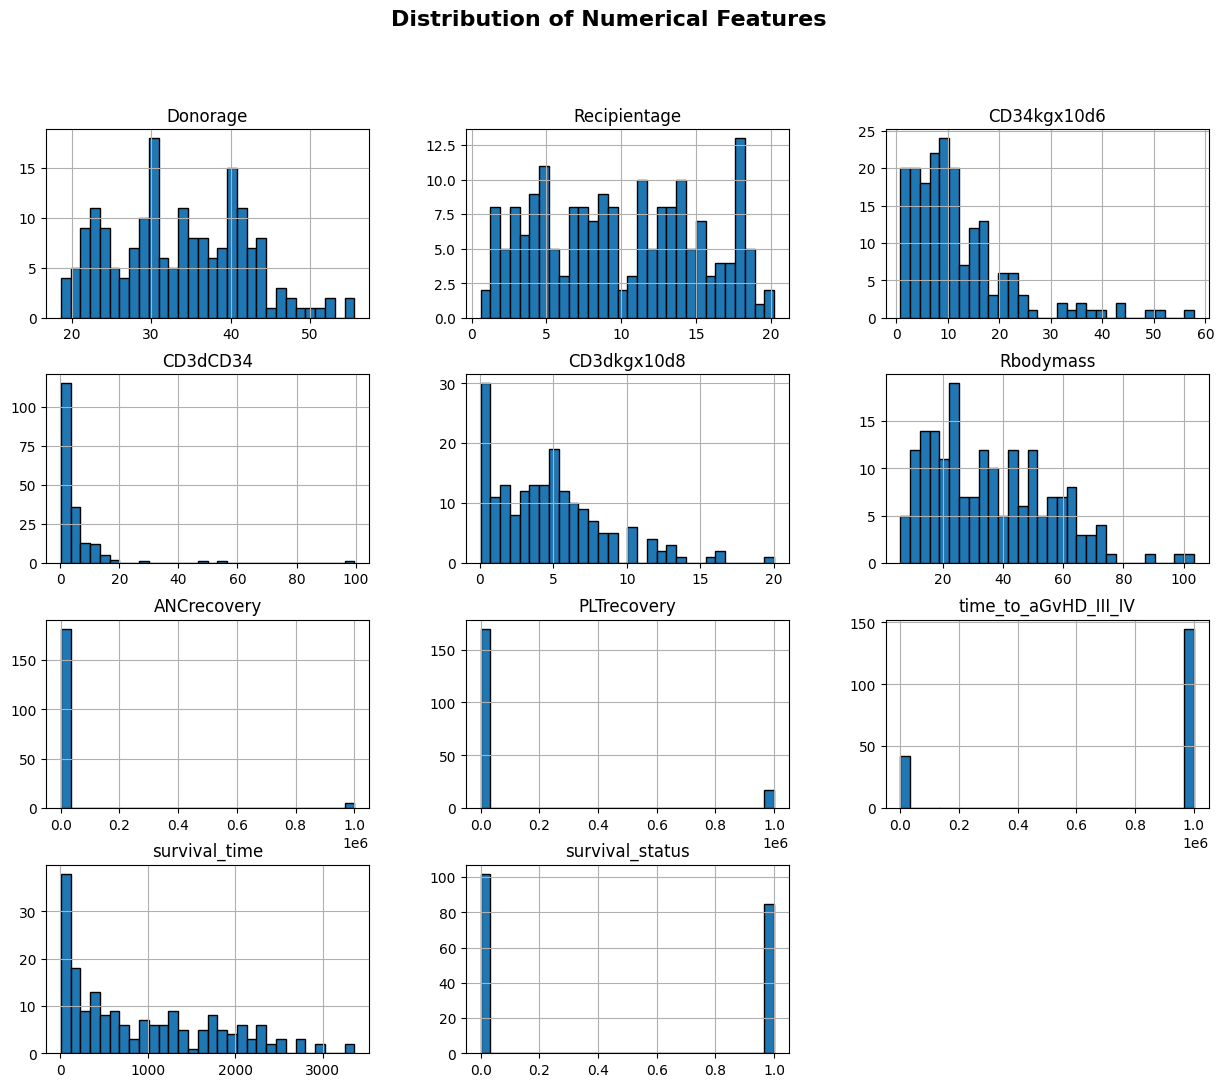

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib with the alias 'plt'

# Histograms
plt.figure(figsize=(15, 12))
df.hist(bins=30, edgecolor='black', figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold')
plt.show()

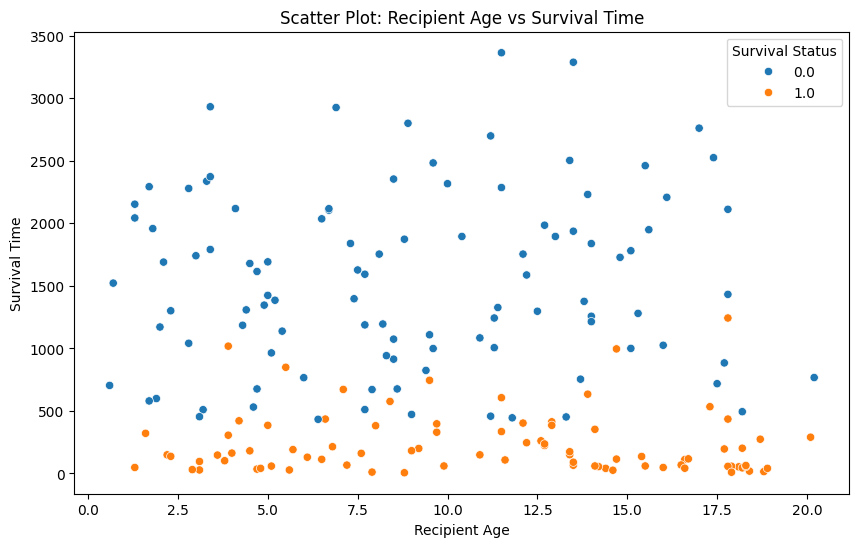

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn library with alias 'sns'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Recipientage'], y=df['survival_time'], hue=df['survival_status'])
plt.title("Scatter Plot: Recipient Age vs Survival Time")
plt.xlabel("Recipient Age")
plt.ylabel("Survival Time")
plt.legend(title="Survival Status")
plt.show()

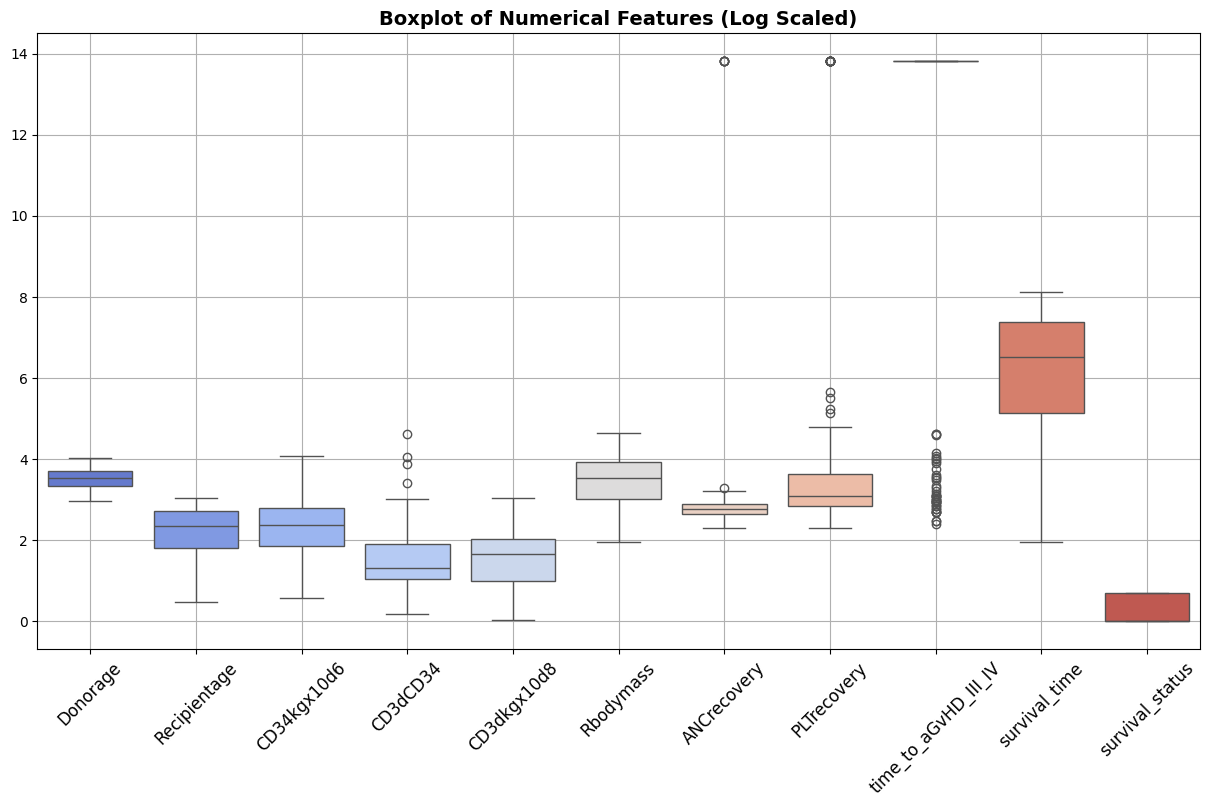

In [ ]:

numeric_df = df.select_dtypes(include=[np.number])
log_df = numeric_df.apply(lambda x: np.log1p(x))

plt.figure(figsize=(15, 8))
sns.boxplot(data=log_df, palette='coolwarm', whis=1.5, showfliers=True)
plt.xticks(rotation=45, fontsize=12)
plt.title("Boxplot of Numerical Features (Log Scaled)", fontsize=14, fontweight='bold')
plt.grid()
plt.show()

In [ ]:
# Standardize data for better visualization
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)


In [ ]:
df.describe()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.314224,4.734465,35.771123,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.478524,3.807513,19.547121,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.809375,1.725000,19.250000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.771418,6.575000,50.300000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


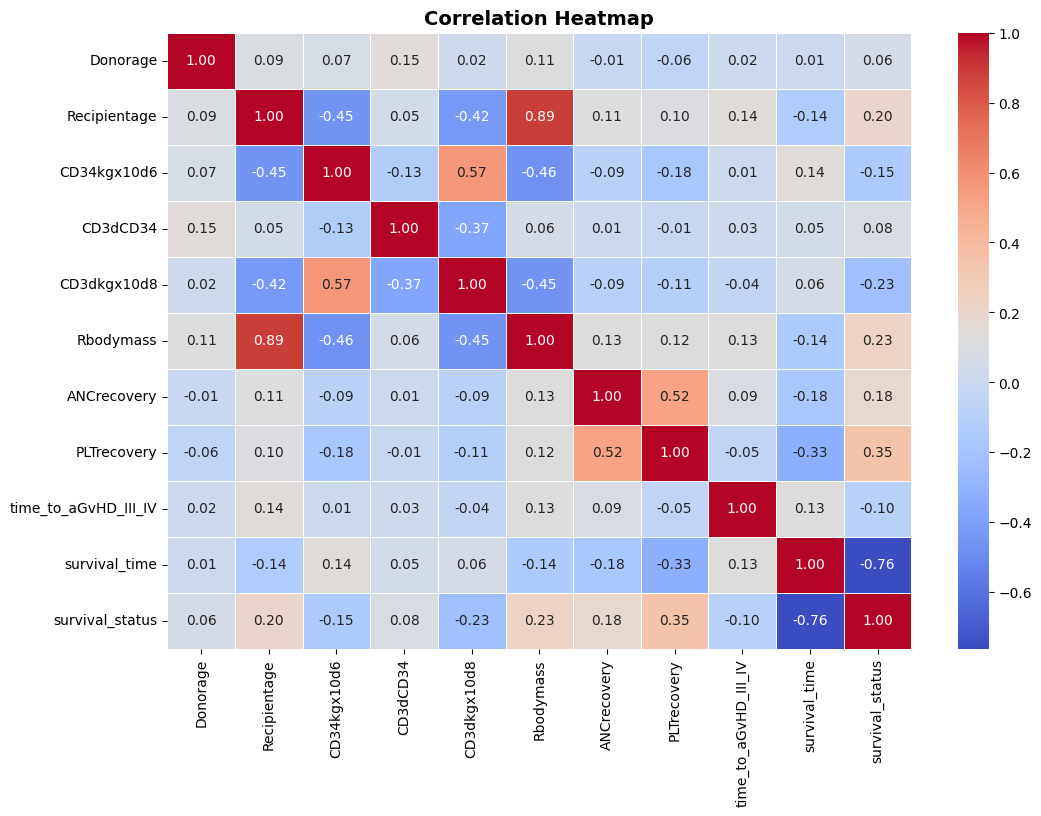

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
# Replace 'target_column' with the actual target column name, which is likely 'survival_status'
X = df.drop(columns=['survival_status'])  # Features (drop the target column)
y = df['survival_status']  # Target variable (0 = did not survive, 1 = survived)

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE # Import the SMOTE class from imblearn.over_sampling


In [ ]:
# Convert 'survival_status' to categorical if it's not already
y = y.astype(int)  # Assuming 'survival_status' should be 0 or 1

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_resampled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split from sklearn.model_selection

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Random Forest Model Evaluation:
Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.90      0.95        20

    accuracy                           0.95        41
   macro avg       0.96      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



<ipython-input-45-c6461e0ff6d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


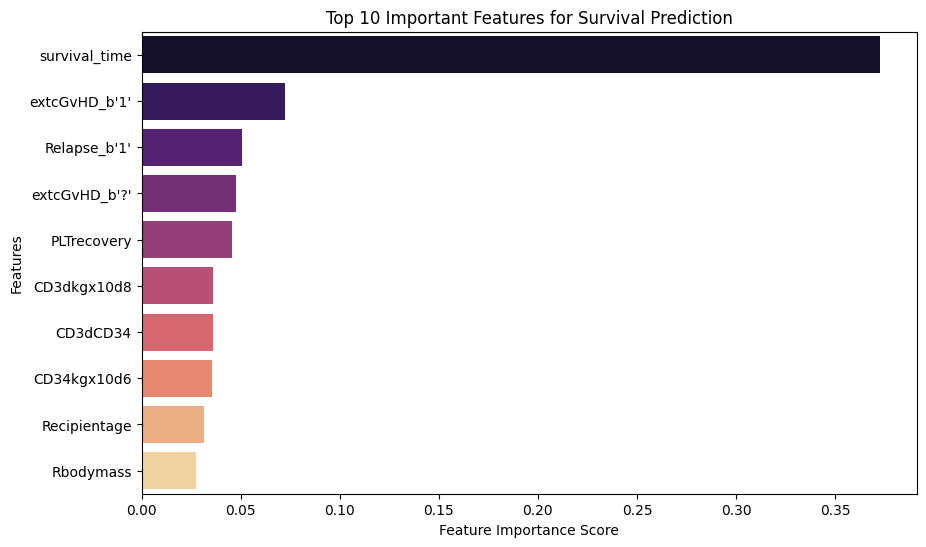

In [ ]:
# Get feature importances and plot (This should be in the same cell)
importances = rf_model.feature_importances_ # Changed 'model' to 'rf_model'
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title("Top 10 Important Features for Survival Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

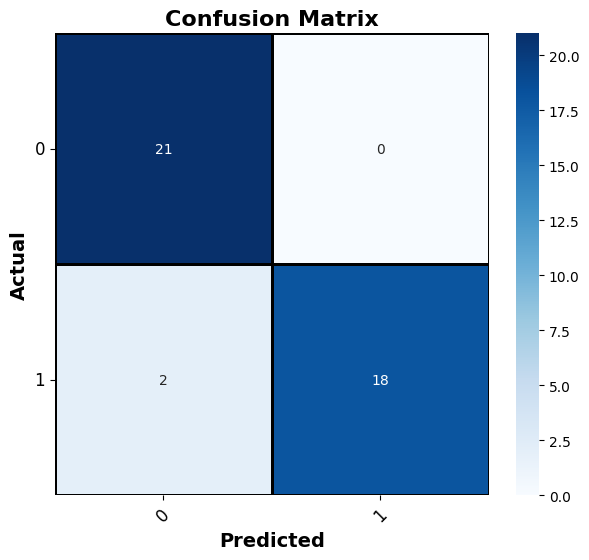

In [ ]:

from sklearn.metrics import confusion_matrix # Import confusion_matrix

plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black') # Use y_pred instead of rf_predictions
plt.xticks(ticks=np.arange(len(np.unique(y))) + 0.5, labels=np.unique(y), fontsize=12, rotation=45)
plt.yticks(ticks=np.arange(len(np.unique(y))) + 0.5, labels=np.unique(y), fontsize=12, rotation=0)
plt.xlabel("Predicted", fontsize=14, fontweight='bold')
plt.ylabel("Actual", fontsize=14, fontweight='bold')
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
print(df.iloc[:, -1].value_counts())  # Check if the target variable is imbalanced


extcGvHD_b'?'
False    156
True      31
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6585365853658537
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70        21
           1       0.69      0.55      0.61        20

    accuracy                           0.66        41
   macro avg       0.66      0.66      0.65        41
weighted avg       0.66      0.66      0.65        41



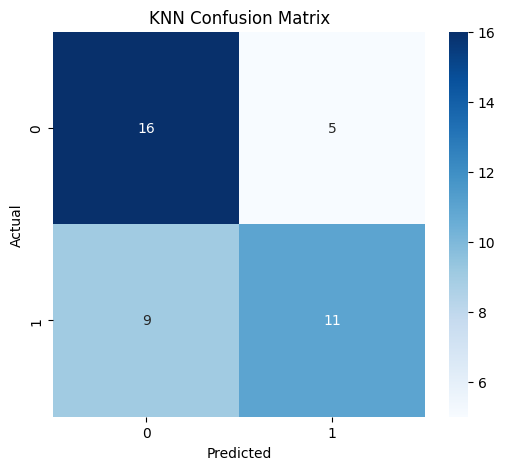

In [ ]:
# Compute confusion matrix for KNN model
knn_cm = confusion_matrix(y_test, y_pred_knn) # Changed 'knn_pred' to 'y_pred_knn'

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:58:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9512195121951219
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.90      0.95        20

    accuracy                           0.95        41
   macro avg       0.96      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



<Axes: >

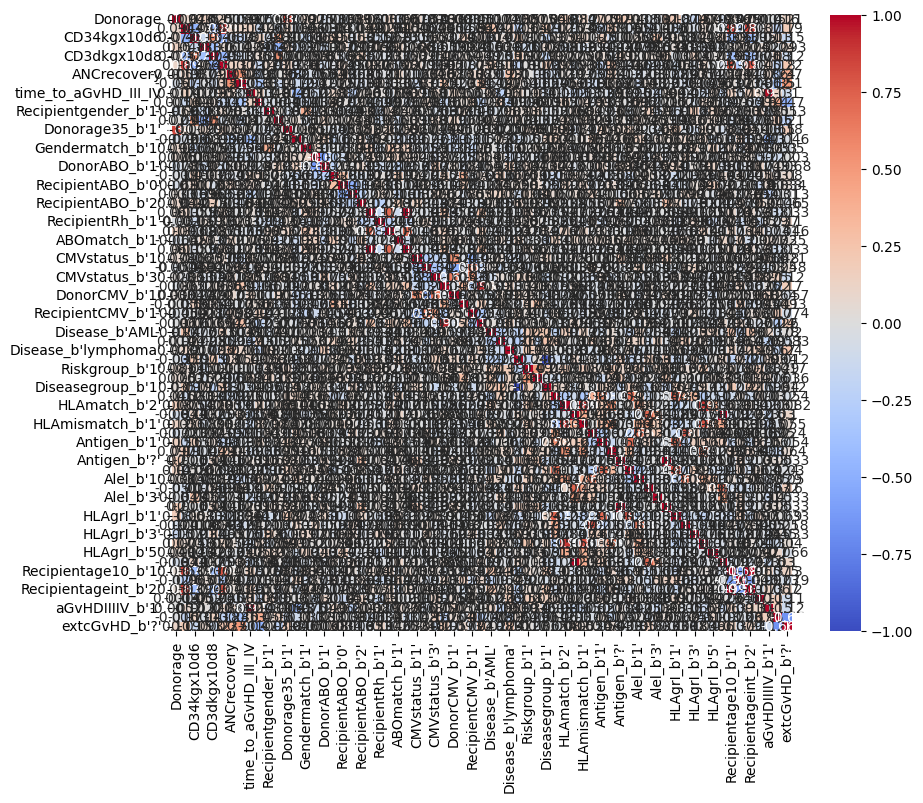

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=3, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

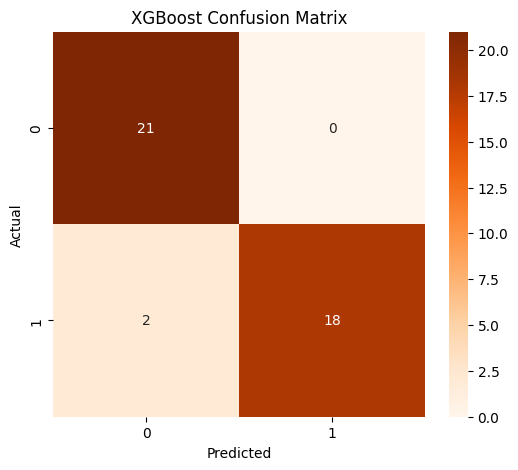

In [ ]:
# Compute confusion matrix for XGBoost model
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap="Oranges", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


           Model  Accuracy  Precision    Recall  F1-score
0  Random Forest  0.951220   0.955461  0.951220  0.951044
1            KNN  0.658537   0.663171  0.658537  0.654413
2        XGBoost  0.951220   0.955461  0.951220  0.951044


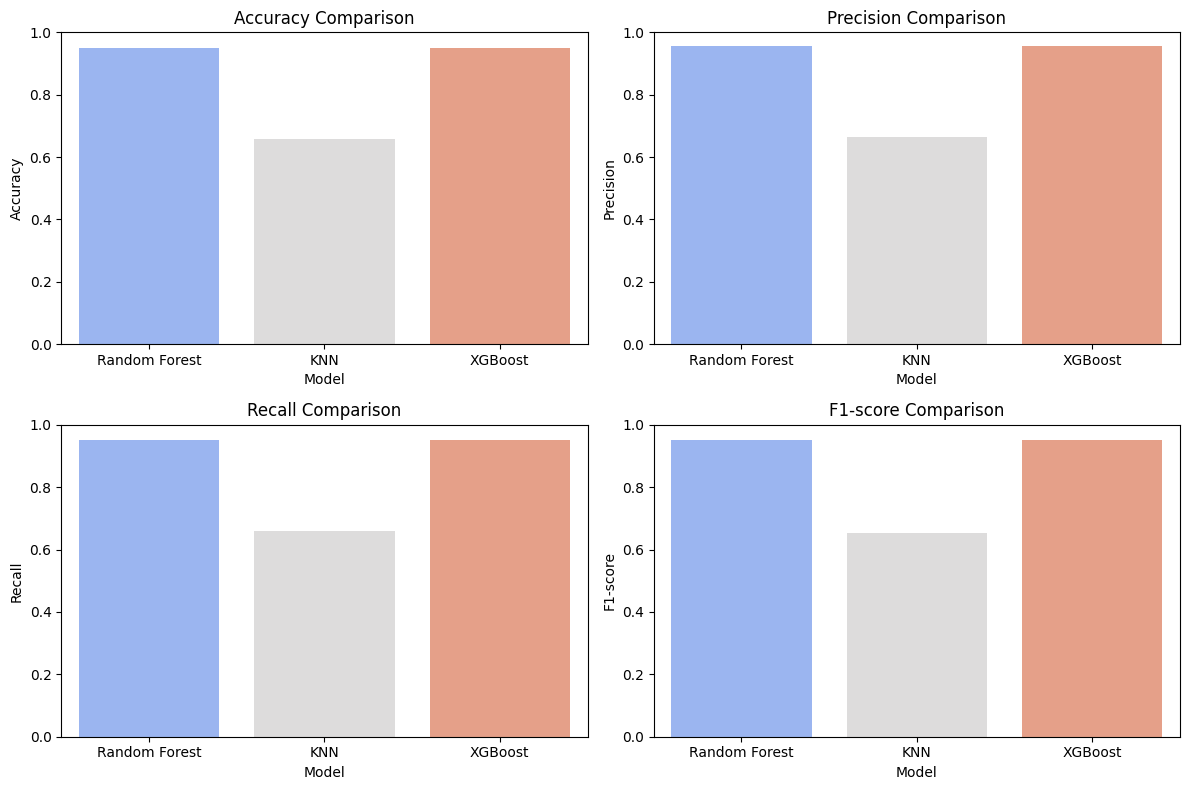

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return [accuracy, precision, recall, f1]

# Store model results
models = ["Random Forest", "KNN", "XGBoost"]
predictions = [rf_pred, knn_pred, xgb_pred]
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

for model, pred in zip(models, predictions):
    acc, prec, rec, f1 = evaluate_model(model, y_test, pred)
    results["Model"].append(model)
    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1-score"].append(f1)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Plot metrics comparison as bar graphs
plt.figure(figsize=(12, 8))
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x="Model", y=metric, data=results_df, palette="coolwarm")
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.weightstats import ztest

# Z-test on Donor age vs population mean 35
z_stat, p_val = ztest(df['Donorage'].dropna(), value=35)
print("Z-Test on Donor Age:\nZ-statistic:", z_stat, "\nP-value:", p_val)


Z-Test on Donor Age:
Z-statistic: -2.525942512670555 
P-value: 0.011538836106203609


In [ ]:
# Print column names to check if 'Recipientgender' exists exactly
print(df.columns.tolist())


['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time', 'survival_status', "Recipientgender_b'1'", "Stemcellsource_b'1'", "Donorage35_b'1'", "IIIV_b'1'", "Gendermatch_b'1'", "DonorABO_b'0'", "DonorABO_b'1'", "DonorABO_b'2'", "RecipientABO_b'0'", "RecipientABO_b'1'", "RecipientABO_b'2'", "RecipientABO_b'?'", "RecipientRh_b'1'", "RecipientRh_b'?'", "ABOmatch_b'1'", "ABOmatch_b'?'", "CMVstatus_b'1'", "CMVstatus_b'2'", "CMVstatus_b'3'", "CMVstatus_b'?'", "DonorCMV_b'1'", "DonorCMV_b'?'", "RecipientCMV_b'1'", "RecipientCMV_b'?'", "Disease_b'AML'", "Disease_b'chronic'", "Disease_b'lymphoma'", "Disease_b'nonmalignant'", "Riskgroup_b'1'", "Txpostrelapse_b'1'", "Diseasegroup_b'1'", "HLAmatch_b'1'", "HLAmatch_b'2'", "HLAmatch_b'3'", "HLAmismatch_b'1'", "Antigen_b'0'", "Antigen_b'1'", "Antigen_b'2'", "Antigen_b'?'", "Alel_b'0'", "Alel_b'1'", "Alel_b'2'", "Alel_b'3'", "Alel_b'?'", "HLAgrI_b'1'", "HLA

In [ ]:
from scipy.stats import ttest_ind

# Male group: where male column is 1
group_male = df[df["Recipientgender_b'1'"] == 1]['Rbodymass']

# Female group: where male column is 0 (i.e., not male)
group_female = df[df["Recipientgender_b'1'"] == 0]['Rbodymass']

# Run t-test
t_stat, p_val = ttest_ind(group_male.dropna(), group_female.dropna())
print("T-test for Rbodymass by gender:\nT-statistic:", t_stat, "\nP-value:", p_val)


T-test for Rbodymass by gender:
T-statistic: 1.0704533173668664 
P-value: 0.2858098961471742


In [ ]:
from statsmodels.stats.weightstats import ztest

# Extract groups
group_aml = df[df["Disease_b'AML'"] == 1]['survival_time']
group_lymphoma = df[df["Disease_b'lymphoma'"] == 1]['survival_time']

# Run Z-test
z_stat, p_val = ztest(group_aml.dropna(), group_lymphoma.dropna())
print("Z-test for survival_time (AML vs Lymphoma):\nZ-statistic:", z_stat, "\nP-value:", p_val)


Z-test for survival_time (AML vs Lymphoma):
Z-statistic: 2.478550013716974 
P-value: 0.013191761524029821


In [ ]:
from scipy.stats import f_oneway

# Define groups
group_abo_0 = df[df["DonorABO_b'0'"] == 1]['CD3dCD34']
group_abo_1 = df[df["DonorABO_b'1'"] == 1]['CD3dCD34']
group_abo_2 = df[df["DonorABO_b'2'"] == 1]['CD3dCD34']

# Run ANOVA
f_stat, p_val = f_oneway(group_abo_0.dropna(), group_abo_1.dropna(), group_abo_2.dropna())
print("ANOVA for CD3dCD34 by Donor ABO type:\nF-statistic:", f_stat, "\nP-value:", p_val)


ANOVA for CD3dCD34 by Donor ABO type:
F-statistic: 0.9573259640001318 
P-value: 0.3861618224106781


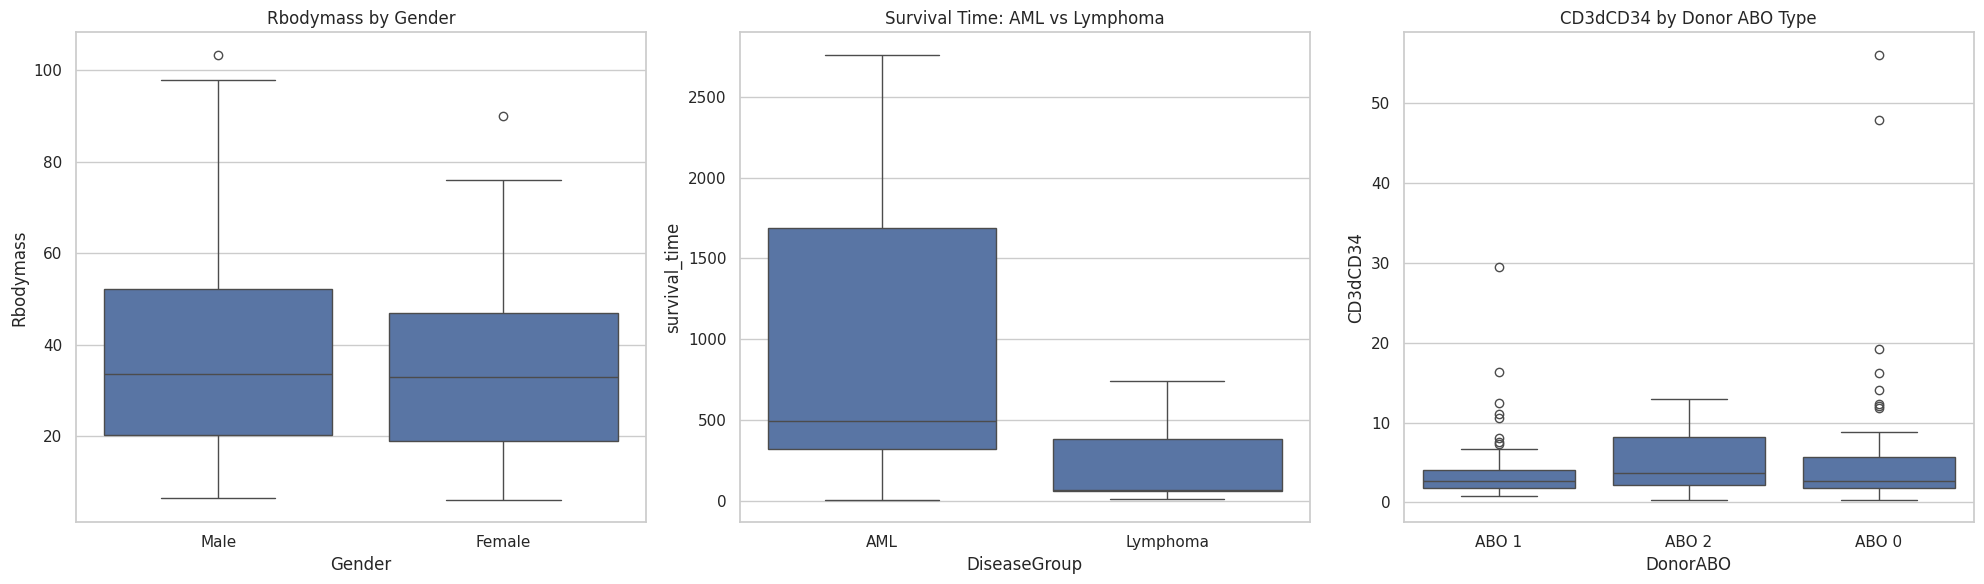

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Boxplot: Rbodymass by gender
df['Gender'] = df["Recipientgender_b'1'"].apply(lambda x: 'Male' if x == 1 else 'Female')
sns.boxplot(x='Gender', y='Rbodymass', data=df, ax=axes[0])
axes[0].set_title("Rbodymass by Gender")

# 2. Boxplot: survival_time by Disease (AML vs Lymphoma)
df['DiseaseGroup'] = df.apply(lambda row: 'AML' if row["Disease_b'AML'"] == 1 else ('Lymphoma' if row["Disease_b'lymphoma'"] == 1 else 'Other'), axis=1)
sns.boxplot(x='DiseaseGroup', y='survival_time', data=df[df['DiseaseGroup'].isin(['AML', 'Lymphoma'])], ax=axes[1])
axes[1].set_title("Survival Time: AML vs Lymphoma")

# 3. Boxplot: CD3dCD34 by Donor ABO group
def get_abo(row):
    if row["DonorABO_b'0'"] == 1:
        return 'ABO 0'
    elif row["DonorABO_b'1'"] == 1:
        return 'ABO 1'
    elif row["DonorABO_b'2'"] == 1:
        return 'ABO 2'
    else:
        return 'Unknown'

df['DonorABO'] = df.apply(get_abo, axis=1)
sns.boxplot(x='DonorABO', y='CD3dCD34', data=df[df['DonorABO'].isin(['ABO 0', 'ABO 1', 'ABO 2'])], ax=axes[2])
axes[2].set_title("CD3dCD34 by Donor ABO Type")

plt.tight_layout()
plt.show()
